# Objective

Ninjacart has provided us with a dataset with images of onions, potatoes, tomatoes and some market scenes. We have been tasked with preparing a multiclass classifier for identifying these vegetables correctly.

#### Import Basic Libraries

In [12]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Download the Dataset

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [14]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/ninjacart_data.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content/ninja')

  zip.close()
  print('Done')

Done


In [15]:
drive.flush_and_unmount()

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

#### Split the dataset into Train and Validation sets

In [7]:
image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    '/content/ninja/ninjacart_data/train',
    labels = 'inferred',
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'training',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

val_ds = image_dataset_from_directory(
    '/content/ninja/ninjacart_data/train',
    labels = 'inferred',
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'validation',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.


#### Shape of the Train & Test sets

In [8]:
data_dir = '/content/ninja/ninjacart_data/train'
class_names = os.listdir(data_dir)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"{class_name}: {num_images} images")

potato: 898 images
indian market: 599 images
onion: 849 images
tomato: 789 images


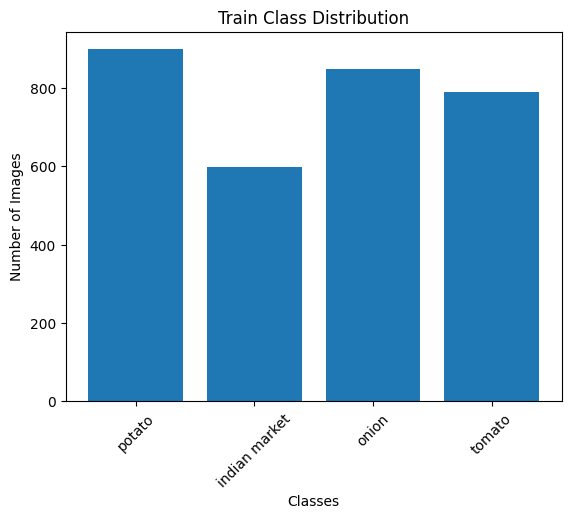

In [9]:
class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names]

plt.bar(class_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Train Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [10]:
test_ds = image_dataset_from_directory(
    '/content/ninja/ninjacart_data/test',
    labels = 'inferred',
    label_mode = 'int',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

Found 351 files belonging to 4 classes.


In [11]:
data_dir = '/content/ninja/ninjacart_data/test'
class_names = os.listdir(data_dir)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"{class_name}: {num_images} images")


potato: 81 images
indian market: 81 images
onion: 83 images
tomato: 106 images


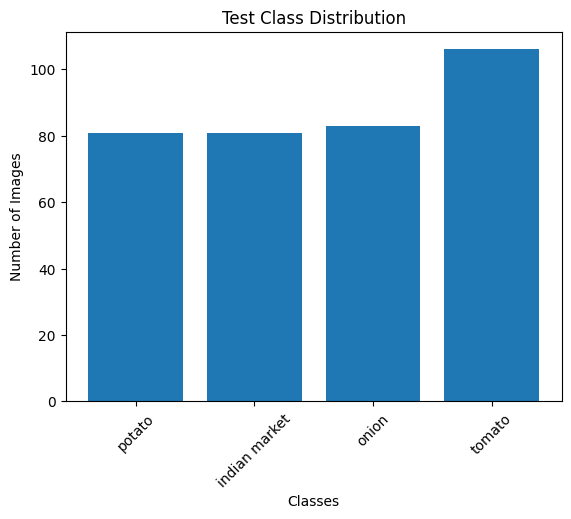

In [12]:
class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names]

plt.bar(class_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Test Class Distribution')
plt.xticks(rotation=45)
plt.show()

#### Identify the Label & Dimensions of the Images

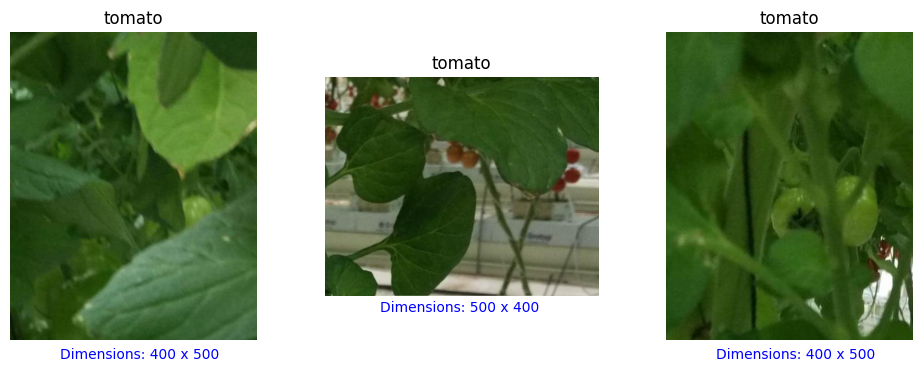

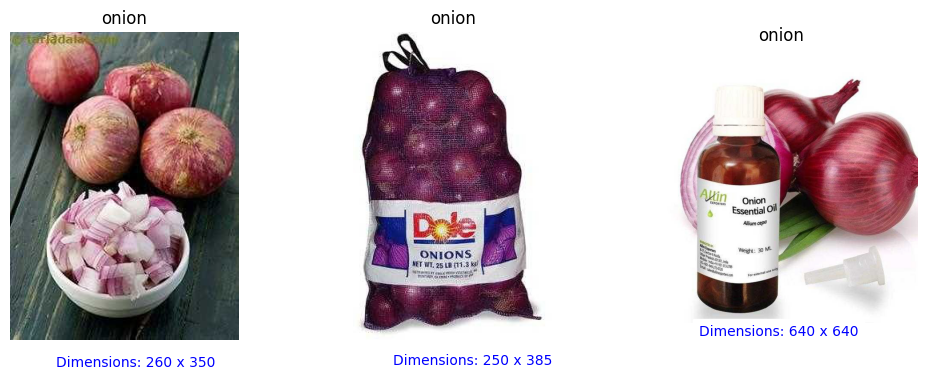

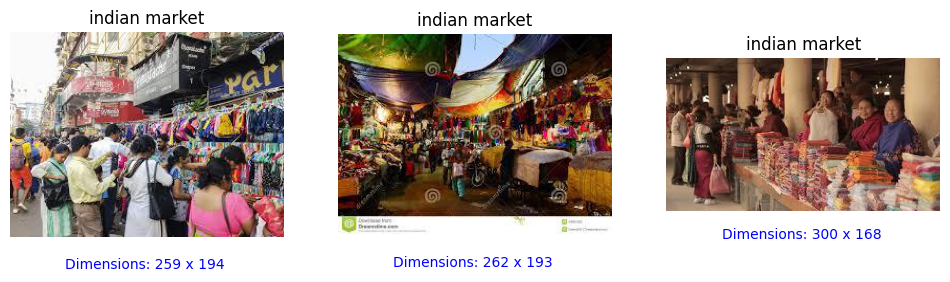

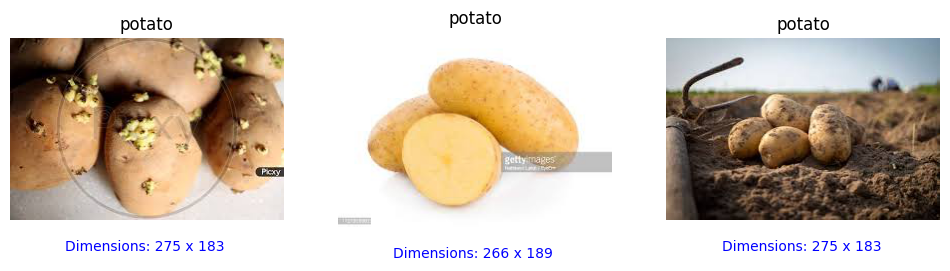

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the number of images to display per class
num_images_to_display = 3

# Loop over each class and display sample images
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_dir)[:num_images_to_display]

    # Create a subplot for each image
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 4))

    # Loop over image files and display them
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        image = Image.open(image_path)

        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(class_name)

        # Get image dimensions and display them as text
        width, height = image.size
        axes[i].text(width/5, height+30, f"Dimensions: {width} x {height}", color='blue', backgroundcolor='white')

    plt.show()


In [17]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                validation_split=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255., validation_split=0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory('/content/ninja/ninjacart_data/train',
                                                    subset='training',
                                                    batch_size = 32,
                                                    class_mode = 'sparse',
                                                    target_size=(224, 224))

test_generator = test_datagen.flow_from_directory('/content/ninja/ninjacart_data/test',
                                                  batch_size=32,
                                                  class_mode = 'sparse',
                                                  target_size = (224, 224))

val_generator = val_datagen.flow_from_directory('/content/ninja/ninjacart_data/train',
                                                    subset='validation',
                                                    batch_size = 32,
                                                    class_mode = 'sparse',
                                                    target_size=(224, 224))


Found 2511 images belonging to 4 classes.
Found 351 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


#### Segregate Train and Test sets

In [14]:
# Get a batch of data from the train generator
x_train, y_train = next(train_generator)

# Verify the shape of the input data and labels
print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train.shape)

# Get a batch of data from the test generator
x_test, y_test = next(test_generator)

# Verify the shape of the input data and labels
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Train data shape: (32, 224, 224, 3)
Train labels shape: (32,)
Test data shape: (32, 224, 224, 3)
Test labels shape: (32,)


#### Import Tensorflow libraries for model building

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

In [58]:
NUM_CLASSES = 4
image_size = (128, 128)
height, width = image_size
hidden_size1 = 256
hidden_size2 = 256

ann_model = keras.Sequential(
    name = 'ANN_Model',
    layers = [
        layers.Flatten(input_shape=(height, width, 3)),
        layers.Dense(units=hidden_size1, activation='relu'),
        layers.Dense(units=hidden_size2, activation='relu'),
        layers.Dense(units=NUM_CLASSES, activation='softmax')
    ]
)

ann_model.summary()

Model: "ANN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 49152)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               12583168  
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 12,649,988
Trainable params: 12,649,988
Non-trainable params: 0
_________________________________________________________________


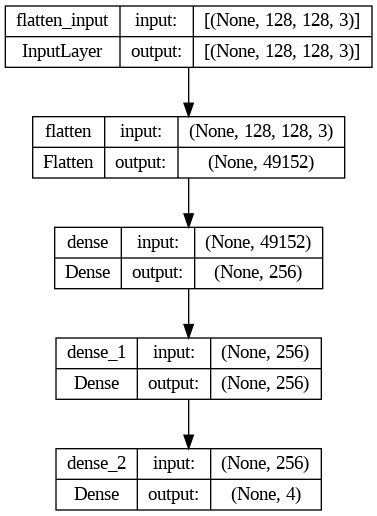

In [9]:
tf.keras.utils.plot_model(ann_model, show_shapes=True)

In [67]:
ann_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [68]:
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

INPUT_SHAPE = (128, 256, 3)
BATCH_SIZE = 32

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=(128,256),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=(128,256),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


In [ ]:
ann_history = ann_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 10
)

#### Build VGG Model

In [33]:
# Constants
NUM_CLASSES = 4
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
EPOCHS = 10

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze the base model's layers
vgg_model.trainable = False

# Create the model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

vgg_model = model
# Print model summary
vgg_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
___________________________________

In [34]:
# Compile the model
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/test',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create TensorBoard callback for VGG model
vgg_tensorboard_callback = TensorBoard(log_dir='/content/logs/vgg')


Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [48]:
# Train the Model
vgg_history = vgg_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = EPOCHS,
    verbose = 2,
    callbacks = [vgg_tensorboard_callback]
)

Epoch 1/10
79/79 - 26s - loss: 1.1691 - accuracy: 0.7093 - val_loss: 0.3296 - val_accuracy: 0.8574 - 26s/epoch - 334ms/step
Epoch 2/10
79/79 - 18s - loss: 0.3086 - accuracy: 0.8777 - val_loss: 0.2709 - val_accuracy: 0.9071 - 18s/epoch - 232ms/step
Epoch 3/10
79/79 - 18s - loss: 0.2047 - accuracy: 0.9176 - val_loss: 0.3326 - val_accuracy: 0.8494 - 18s/epoch - 231ms/step
Epoch 4/10
79/79 - 19s - loss: 0.1784 - accuracy: 0.9347 - val_loss: 0.2706 - val_accuracy: 0.8814 - 19s/epoch - 242ms/step
Epoch 5/10
79/79 - 19s - loss: 0.1312 - accuracy: 0.9550 - val_loss: 0.2623 - val_accuracy: 0.8990 - 19s/epoch - 236ms/step
Epoch 6/10
79/79 - 19s - loss: 0.1025 - accuracy: 0.9610 - val_loss: 0.2857 - val_accuracy: 0.8894 - 19s/epoch - 242ms/step
Epoch 7/10
79/79 - 19s - loss: 0.1005 - accuracy: 0.9661 - val_loss: 0.2671 - val_accuracy: 0.9054 - 19s/epoch - 235ms/step
Epoch 8/10
79/79 - 19s - loss: 0.0737 - accuracy: 0.9713 - val_loss: 0.2934 - val_accuracy: 0.9006 - 19s/epoch - 240ms/step
Epoch 9/

#### Build ResNet Model

In [49]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import TensorBoard

In [50]:
# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze the base model's layers
resnet_model.trainable = False

# Create the model
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model = model
# Print model summary
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_17 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 49,279,108
Trainable params: 25,691,396
Non-trainable params: 23,587,712
_________________________________________________________________


In [51]:
# Compile the Resnet model
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/test',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create TensorBoard callback for ResNet model
resnet_tensorboard_callback = TensorBoard(log_dir='/content/logs/resnet')

Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [52]:
# Train the Resnet model
resnet_history = resnet_model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples,
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples,
    epochs=EPOCHS,
    callbacks=[resnet_tensorboard_callback]
)

Epoch 1/10
79/79 [==============================] - 26s 280ms/step - loss: 2.9601 - accuracy: 0.3003 - val_loss: 1.3845 - val_accuracy: 0.2853
Epoch 2/10
79/79 [==============================] - 18s 232ms/step - loss: 1.3915 - accuracy: 0.2855 - val_loss: 1.3819 - val_accuracy: 0.2869
Epoch 3/10
79/79 [==============================] - 20s 246ms/step - loss: 1.3810 - accuracy: 0.2863 - val_loss: 1.3799 - val_accuracy: 0.2869
Epoch 4/10
79/79 [==============================] - 19s 242ms/step - loss: 1.3793 - accuracy: 0.2863 - val_loss: 1.3783 - val_accuracy: 0.2869
Epoch 5/10
79/79 [==============================] - 20s 247ms/step - loss: 1.3780 - accuracy: 0.2863 - val_loss: 1.3774 - val_accuracy: 0.2869
Epoch 6/10
79/79 [==============================] - 19s 242ms/step - loss: 1.3854 - accuracy: 0.2840 - val_loss: 1.3766 - val_accuracy: 0.2869
Epoch 7/10
79/79 [==============================] - 19s 239ms/step - loss: 1.3765 - accuracy: 0.2863 - val_loss: 1.3761 - val_accuracy: 0.2869

#### Build MobileNet Model

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the input shape and number of classes
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 4
BATCH_SIZE = 32

# Load the MobileNet model (without the top layer)
mnet_model = MobileNet(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in mnet_model.layers:
    layer.trainable = False

# Add a new top layer for classification
x = GlobalAveragePooling2D()(mnet_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
mnet_model = Model(inputs=mnet_model.input, outputs=output)

# Print the model summary
mnet_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [38]:
# Compile the MobileNet model
mnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/train',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/ninja/ninjacart_data/test',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create TensorBoard callback for MobileNet model
mnet_tensorboard_callback = TensorBoard(log_dir='/content/logs/mnet')

Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [46]:
# Train the model
mnet_history = mnet_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
79/79 [==============================] - 18s 196ms/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.7969 - val_accuracy: 0.8575
Epoch 2/10
79/79 [==============================] - 16s 200ms/step - loss: 6.8466e-04 - accuracy: 1.0000 - val_loss: 0.8092 - val_accuracy: 0.8661
Epoch 3/10
79/79 [==============================] - 17s 210ms/step - loss: 1.3410e-04 - accuracy: 1.0000 - val_loss: 0.7853 - val_accuracy: 0.8604
Epoch 4/10
79/79 [==============================] - 16s 206ms/step - loss: 5.6958e-05 - accuracy: 1.0000 - val_loss: 0.8163 - val_accuracy: 0.8632
Epoch 5/10
79/79 [==============================] - 18s 224ms/step - loss: 3.2827e-05 - accuracy: 1.0000 - val_loss: 0.8289 - val_accuracy: 0.8632
Epoch 6/10
79/79 [==============================] - 15s 191ms/step - loss: 2.3877e-05 - accuracy: 1.0000 - val_loss: 0.8367 - val_accuracy: 0.8632
Epoch 7/10
79/79 [==============================] - 23s 293ms/step - loss: 1.8628e-05 - accuracy: 1.0000 - val_loss: 0.832

#### Model Comparison

### ANN
Total params: 12,649,988

Trainable params: 12,649,988

Non-trainable params: 0

### VGG16

Total params: 21,138,500

Trainable params: 6,423,812

Non-trainable params: 14,714,688

### ResNet50

Total params: 49,279,108

Trainable params: 25,691,396

Non-trainable params: 23,587,712

# MobileNet

Total params: 3,524,676

Trainable params: 295,812

Non-trainable params: 3,228,864

#### Compare Performance of Models

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

11/11 [==============================] - 2s 169ms/step


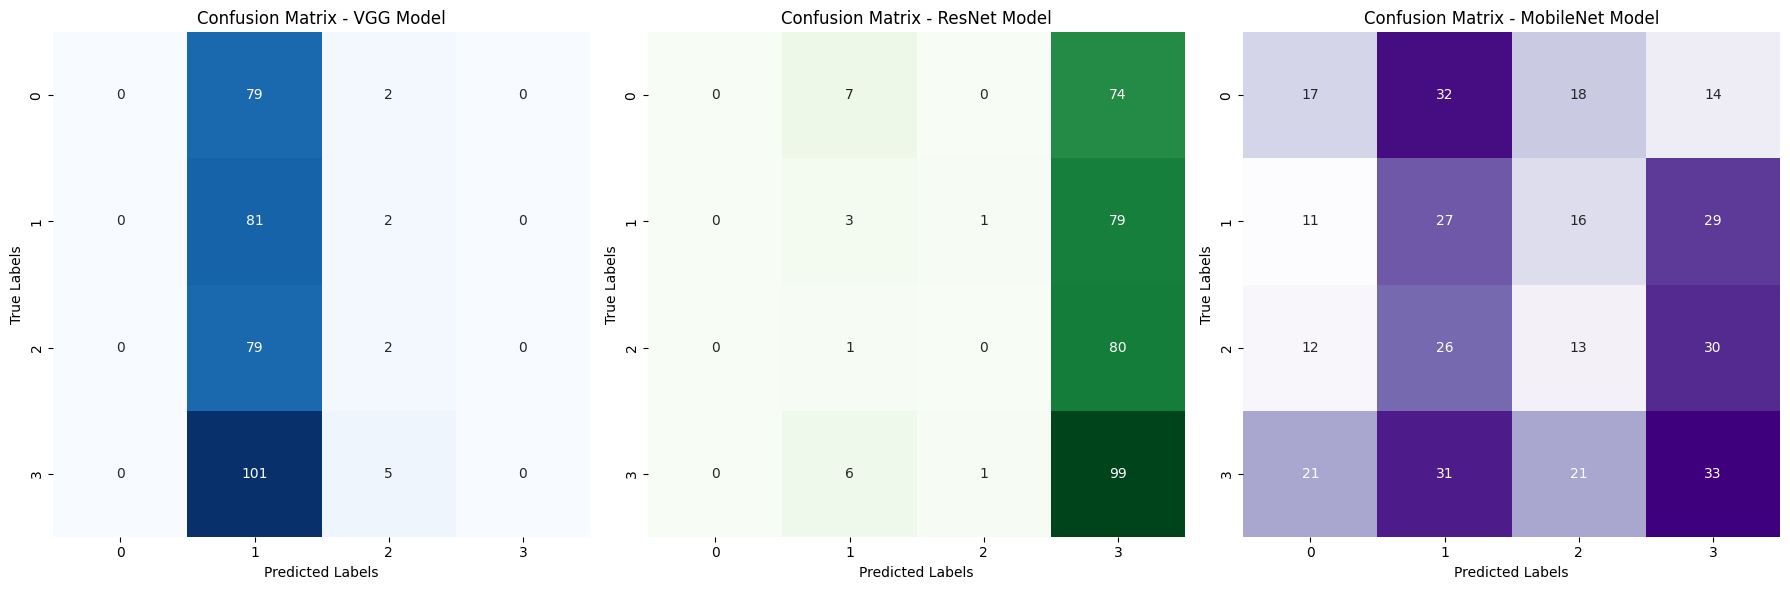

In [44]:
# Make predictions with the VGG model
vgg_predictions = vgg_model.predict(test_generator)
vgg_predicted_labels = np.argmax(vgg_predictions, axis=1)
vgg_true_labels = test_generator.classes

# Make predictions with the ResNet model
resnet_predictions = resnet_model.predict(test_generator)
resnet_predicted_labels = np.argmax(resnet_predictions, axis=1)
resnet_true_labels = test_generator.classes

# Make predictions with the MobileNet model
mnet_predictions = mnet_model.predict(test_generator)
mnet_predicted_labels = np.argmax(mnet_predictions, axis=1)
mnet_true_labels = test_generator.classes

# Compute confusion matrices
vgg_cm = confusion_matrix(vgg_true_labels, vgg_predicted_labels)
resnet_cm = confusion_matrix(resnet_true_labels, resnet_predicted_labels)
mnet_cm = confusion_matrix(mnet_true_labels, mnet_predicted_labels)

# Plot confusion matrices
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(vgg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - VGG Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 3, 2)
sns.heatmap(resnet_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - ResNet Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 3, 3)
sns.heatmap(mnet_cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - MobileNet Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


#### Training & Loss Accuracy of Models

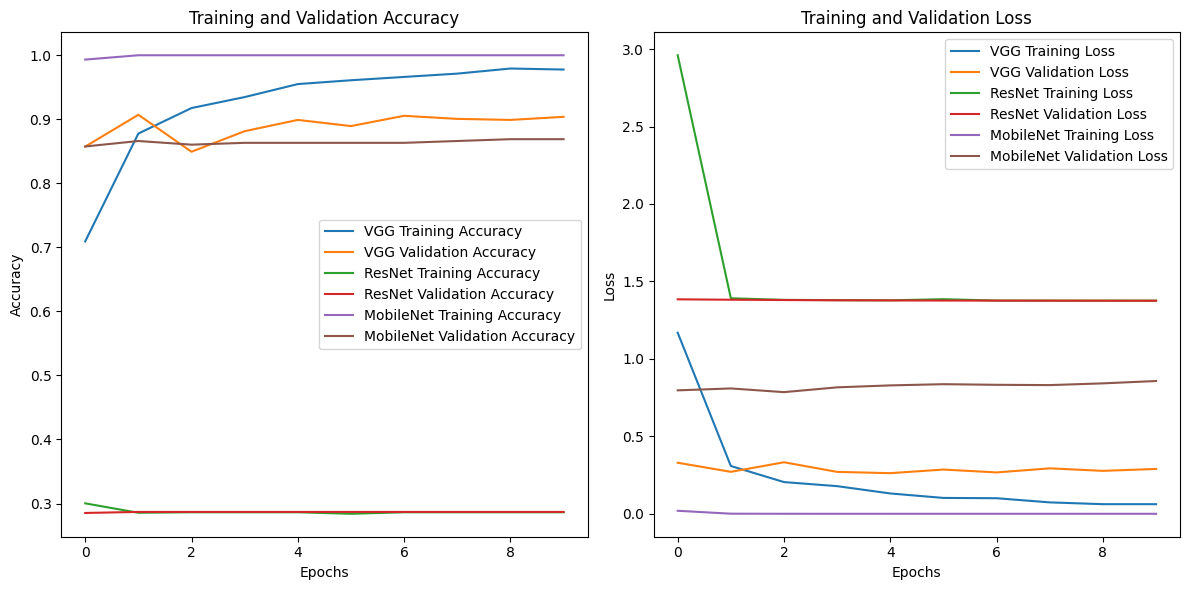

In [53]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='VGG Training Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Validation Accuracy')
plt.plot(resnet_history.history['accuracy'], label='ResNet Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet Validation Accuracy')
plt.plot(mnet_history.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(mnet_history.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='VGG Training Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Validation Loss')
plt.plot(resnet_history.history['loss'], label='ResNet Training Loss')
plt.plot(resnet_history.history['val_loss'], label='ResNet Validation Loss')
plt.plot(mnet_history.history['loss'], label='MobileNet Training Loss')
plt.plot(mnet_history.history['val_loss'], label='MobileNet Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### Prediction for random inputs

In [54]:
# Test the models on the test set
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(test_generator)
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_generator)
test_loss_mnet, test_accuracy_mnet = mnet_model.evaluate(test_generator)

print("VGG Model - Test Accuracy:", round(test_accuracy_vgg,2)*100)
print("ResNet Model - Test Accuracy:", round(test_accuracy_resnet,2)*100)
print("MobileNet Model - Test Accuracy:", round(test_accuracy_mnet,2)*100)
print()

# Generate predictions for random image samples
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Normalize the image
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Random image samples
image_paths = [
    '/content/ninja/ninjacart_data/test/indian market/indianmarket20.jpeg',
    '/content/ninja/ninjacart_data/test/onion/28W1CL9LAL32.jpg',
    '/content/ninja/ninjacart_data/test/potato/potato1105.jpeg',
    '/content/ninja/ninjacart_data/test/tomato/tomato150.png',
    '/content/ninja/ninjacart_data/test/onion/6LAHM1SFNF3Y.jpg',
    '/content/ninja/ninjacart_data/test/potato/potato1137 (1).jpeg',
    '/content/ninja/ninjacart_data/test/tomato/tomato172.png'
]

# Predict and display the results
for image_path in image_paths:
    predicted_class_vgg = predict_image(vgg_model, image_path)
    predicted_class_resnet = predict_image(resnet_model, image_path)
    predicted_class_mnet = predict_image(mnet_model, image_path)

    print("Image:", image_path)
    print("VGG Model Prediction:", predicted_class_vgg)
    print("ResNet Model Prediction:", predicted_class_resnet)
    print("MobileNet Model Prediction:", predicted_class_mnet)
    print()


11/11 [==============================] - 3s 235ms/step - loss: 0.8572 - accuracy: 0.8689
VGG Model - Test Accuracy: 86.0
ResNet Model - Test Accuracy: 23.0
MobileNet Model - Test Accuracy: 87.0

1/1 [==============================] - 2s 2s/step
Image: /content/ninja/ninjacart_data/test/indian market/indianmarket20.jpeg
VGG Model Prediction: 0
ResNet Model Prediction: 2
MobileNet Model Prediction: 0

1/1 [==============================] - 0s 108ms/step
Image: /content/ninja/ninjacart_data/test/onion/28W1CL9LAL32.jpg
VGG Model Prediction: 1
ResNet Model Prediction: 2
MobileNet Model Prediction: 1

1/1 [==============================] - 0s 22ms/step
Image: /content/ninja/ninjacart_data/test/potato/potato1105.jpeg
VGG Model Prediction: 1
ResNet Model Prediction: 2
MobileNet Model Prediction: 2

1/1 [==============================] - 0s 29ms/step
Image: /content/ninja/ninjacart_data/test/tomato/tomato150.png
VGG Model Prediction: 3
ResNet Model Prediction: 2
MobileNet Model Prediction: 3

1

# Summary & Insights:

Based on the evaluation of the Three models, here are some summary and insights:

**Model Performance**: The VGG model achieved a test accuracy of 86%, MobileNet model has a test accuracy of 87% and the ResNet model achieved a test accuracy of 23%.

**Comparison**: The MobileNet & VGG models have outperformed the ResNet model in terms of test accuracy.

**Overfitting**: It appears that the models might be overfitting to some extent as there is a difference between the training accuracy and the test accuracy.

**Performance on Random Image Samples**: The predictions of the models on random image samples suggest that they can successfully classify the given vegetable images. However, further evaluation and testing on a larger and more diverse dataset would be necessary to have more confidence in their performance.

**TensorBoard Logs**: The TensorBoard logs can provide detailed information about the training process, including metrics like accuracy and loss. By analyzing the logs, you can gain insights into the model's training dynamics, identify potential issues such as convergence problems or learning rate adjustments, and make informed decisions for further model improvement.

Overall, based on the test accuracy and potential overfitting, the MobileNet and VGG models seem to perform better among the three for classifying the vegetable images. However, further optimization and fine-tuning can still be performed to improve the model's performance and generalize better to unseen data.